# matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(1)

## normal scale image

(0, 9)

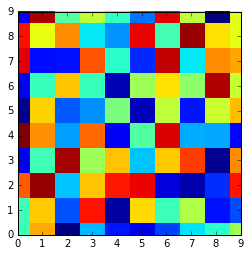

In [2]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')

x = np.arange(0, 10)
y = np.arange(0, 10)
i = img.NonUniformImage(ax, extent=(min(x), max(x), min(y), max(y)))
i.set_data(x, y, np.random.rand(10, 10))
ax.images.append(i)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

## log scale image

([<matplotlib.axis.YTick at 0x10c549a58>,
 <a list of 5 Text yticklabel objects>)

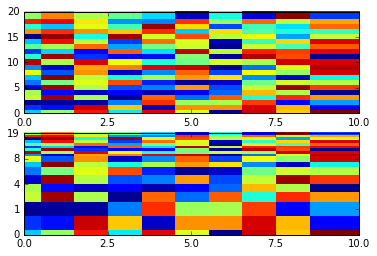

In [3]:
def __log_scale(n):
    logn = np.log2(n)
    y = n * (1 - np.logspace(-logn, 0, n, base=2, endpoint=True))[::-1]
    y = y.astype(int)

    y_inv = np.arange(len(y))
    for i in range(len(y)-1):
        y_inv[y[i]:y[i+1]] = i

    return y, y_inv


rows, cols = 20, 10
D_random = np.random.rand(rows, cols)

fig = plt.figure()

# linear scale
ax1 = fig.add_subplot(211)
im_phantom1 = img.NonUniformImage(ax1, extent=(0, 1, 0, 1))
im_phantom1.set_data(np.arange(cols), np.arange(rows), D_random)

ax1.images.append(im_phantom1)
plt.xticks(np.linspace(0, cols, 5))
plt.yticks(np.linspace(0, rows, 5))

# log scale
ax2 = fig.add_subplot(212)
log_y, log_y_inv = __log_scale(rows)
im_phantom2 = img.NonUniformImage(ax2, extent=(0, 1, 0, 1))
im_phantom2.set_data(np.arange(cols), log_y, D_random)
ax2.images.append(im_phantom2)
plt.xticks(np.linspace(0, cols, 5))
plt.yticks(np.linspace(0, rows - 1, 5), log_y_inv[np.linspace(0, rows - 1, 5).astype(int)])